# 📊 Laptop Sales Data Analysis & Visualization
## 🚀 Exploratory Data Analysis (EDA) Notebook
This notebook explores and visualizes the dataset **Cleaned_Laptop_data**.
We'll analyze pricing trends, ratings, discounts, and specifications.

In [17]:
# 📌 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable inline plotting
%matplotlib inline

## 📂 Load the Dataset
Let's load the **Cleaned_Laptop_data.csv** file and check its structure.

In [18]:
# Load the dataset
Laptop_sales = 'Cleaned_Laptop_data.csv'  # Update path if needed
df = pd.read_csv(Laptop_sales)

# Display first five rows
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


## 🛠️ Data Cleaning & Preprocessing
- Checking for missing values
- Removing duplicate entries
- Converting data types where necessary

In [19]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64


## 📊 Price Distribution Analysis
Let's visualize the distribution of laptop prices.

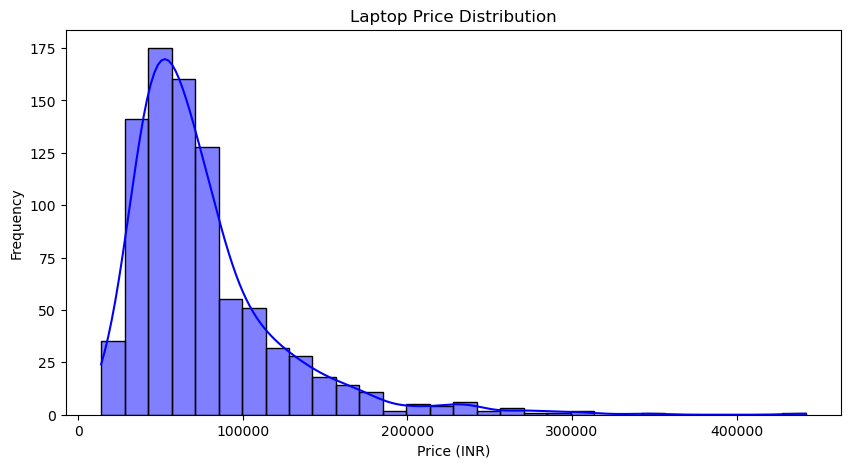

In [20]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['latest_price'], bins=30, kde=True, color='blue')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.title('Laptop Price Distribution')
plt.show()

## 💰 Discount vs Price Analysis
Examining the relationship between **discount percentage** and **price**.

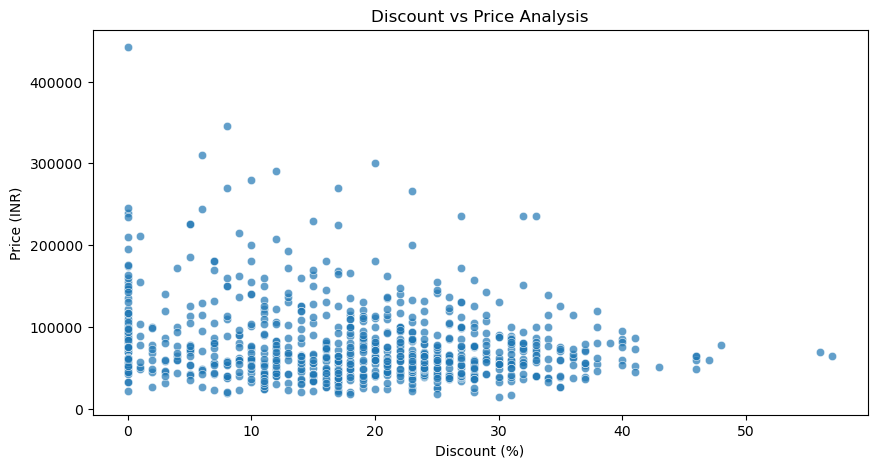

In [21]:
# Scatter plot: Discount vs Price
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['discount'], y=df['latest_price'], alpha=0.7)
plt.xlabel('Discount (%)')
plt.ylabel('Price (INR)')
plt.title('Discount vs Price Analysis')
plt.show()

## ⭐ Rating Analysis
Let's check how ratings are distributed among different laptops.

C:\Users\srini\AppData\Local\Temp\ipykernel_8256\3834522814.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




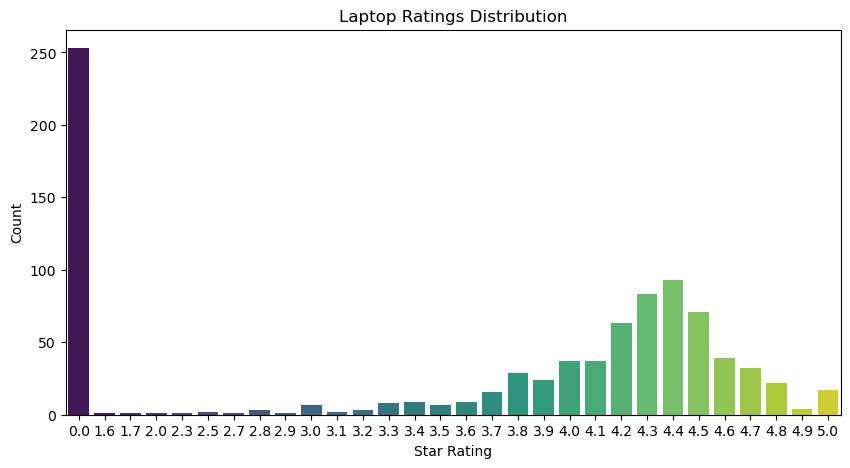

In [22]:
# Star Rating Distribution
plt.figure(figsize=(10,5))
sns.countplot(x=df['star_rating'], palette='viridis')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Laptop Ratings Distribution')
plt.show()

## 🏆 Top 10 Best-Rated Laptops
Let's list the **top 10 laptops** based on **star rating** and **number of ratings**.

In [23]:
# Top 10 Laptops by Ratings
top_laptops = df[['brand', 'model', 'star_rating', 'ratings']].sort_values(by=['star_rating', 'ratings'], ascending=False).head(10)
top_laptops

,brand,model,star_rating,ratings
188,DELL,Vostro,5.0,7
513,ASUS,VivoBook,5.0,6
317,ASUS,ASUS,5.0,5
556,DELL,XPS,5.0,5
60,Lenovo,Ideapad,5.0,4
419,ASUS,ZenBook,5.0,4
535,HP,Pavilion,5.0,4
645,ASUS,ZenBook,5.0,4
285,HP,Spectre,5.0,3
607,ASUS,ExpertBook,5.0,3


## 📈 Interactive Brand-wise Average Price Analysis
Using **Plotly** for interactive visualizations.

C:\Users\srini\AppData\Local\Temp\ipykernel_8256\1630724307.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




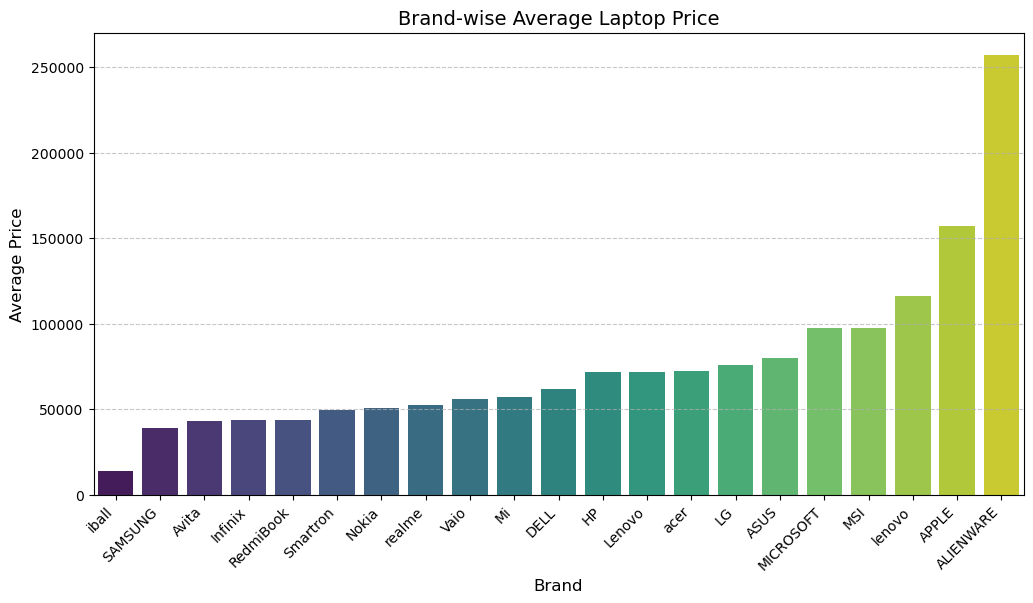

In [28]:
brand_avg_sales = df.groupby('brand')['latest_price'].mean().sort_values()

# Plot the average price per brand
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_sales.index, y=brand_avg_sales.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better visibility
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Brand-wise Average Laptop Price", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🎯 Conclusion
- Most laptops are priced between **₹40,000-₹80,000**.
- Discounts do not strongly correlate with price.
- **Higher-rated** laptops generally have **higher prices**.
- Brand-wise pricing insights help in **budget-friendly choices**.